In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from tensorflow.keras.models import Sequential

In [67]:
from keras.datasets import imdb
(training_data, training_targets), (testing_data,testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets),axis=0)

In [68]:
print("Categories:", np.unique(targets))
print("Number of unique words:",
len(np.unique(np.hstack(data))))  
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))


Categories: [0 1]
Number of unique words: 9998
Average Review length: 234.75892
Standard Deviation: 173


In [69]:
print("Label:", targets[0])
print(data[0])


Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [70]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in
index.items()])
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded)


# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [71]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

data = vectorize(data)
targets = np.array(targets).astype("float32")

In [72]:
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]

In [73]:
model = Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu",input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation ="sigmoid"))
model.summary()
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 50)                500050    
                                                                 
 dropout_22 (Dropout)        (None, 50)                0         
                                                                 
 dense_45 (Dense)            (None, 50)                2550      
                                                                 
 dropout_23 (Dropout)        (None, 50)                0         
                                                                 
 dense_46 (Dense)            (None, 50)                2550      
                                                                 
 dense_47 (Dense)            (None, 1)                 51        
                                                                 
Total params: 505,201
Trainable params: 505,201
Non-t

In [74]:
results_list=[]

In [75]:
results = model.fit(train_x, train_y,epochs= 2,batch_size = 500,validation_data = (test_x, test_y))
results_list.append(results)

Epoch 1/2
80/80 [==============================] - 3s 22ms/step - loss: 0.3994 - accuracy: 0.8214 - val_loss: 0.2619 - val_accuracy: 0.8943
Epoch 2/2
80/80 [==============================] - 1s 19ms/step - loss: 0.2159 - accuracy: 0.9179 - val_loss: 0.2637 - val_accuracy: 0.8926


In [76]:
print(np.mean(results.history["val_accuracy"]))


0.893449991941452


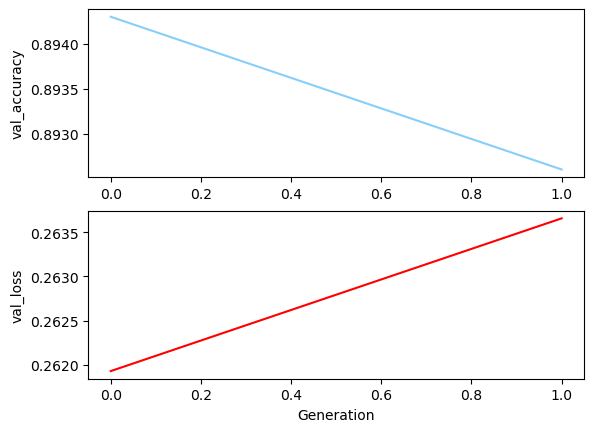

In [77]:
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_ylabel("val_accuracy");
ax[1].set_xlabel("Generation");
ax[1].set_ylabel("val_loss");
ax[0].plot([i for i in range(len(results.history["val_accuracy"]))], results.history["val_accuracy"], color = 'lightskyblue')   
ax[1].plot([i for i in range(len(results.history["val_loss"]))], results.history["val_loss"], color = 'red') 
plt.show()

In [232]:
def vectorize2(sequences, dimension = 5000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


(training_data, training_targets), (testing_data,testing_targets) = imdb.load_data(num_words=5000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets),axis=0)
data = vectorize2(data)
targets = np.array(targets).astype("float32")
test_x = data[:5000]
test_y = targets[:5000]
train_x = data[5000:]
train_y = targets[5000:]



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 50)                250050    
                                                                 
 dropout_32 (Dropout)        (None, 50)                0         
                                                                 
 dense_65 (Dense)            (None, 50)                2550      
                                                                 
 dropout_33 (Dropout)        (None, 50)                0         
                                                                 
 dense_66 (Dense)            (None, 50)                2550      
                                                                 
 dense_67 (Dense)            (None, 1)                 51        
                                                                 
Total params: 255,201
Trainable params: 255,201
Non-t

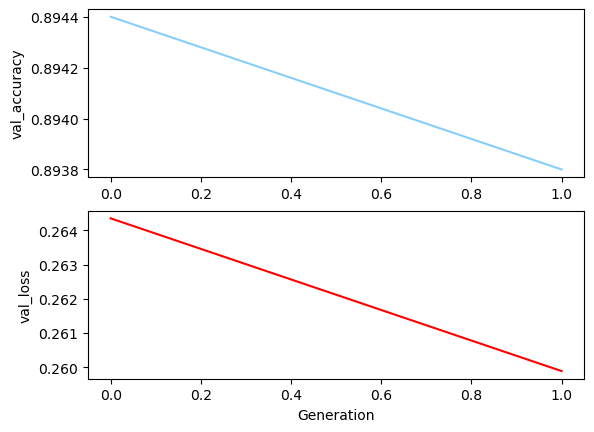

In [233]:
model = Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu",input_shape=(5000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation ="sigmoid"))
model.summary()
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
results = model.fit(train_x, train_y,epochs= 2,batch_size = 500,validation_data = (test_x, test_y))
print(np.mean(results.history["val_accuracy"]))
results_list.append(results)

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_ylabel("val_accuracy");
ax[1].set_xlabel("Generation");
ax[1].set_ylabel("val_loss");
ax[0].plot([i for i in range(len(results.history["val_accuracy"]))], results.history["val_accuracy"], color = 'lightskyblue')   
ax[1].plot([i for i in range(len(results.history["val_loss"]))], results.history["val_loss"], color = 'red') 
plt.show()

In [80]:
def vectorize3(sequences, dimension = 2000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


(training_data, training_targets), (testing_data,testing_targets) = imdb.load_data(num_words=2000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets),axis=0)
data = vectorize3(data)
targets = np.array(targets).astype("float32")
test_x = data[:2000]
test_y = targets[:2000]
train_x = data[2000:]
train_y = targets[2000:]

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 50)                100050    
                                                                 
 dropout_26 (Dropout)        (None, 50)                0         
                                                                 
 dense_53 (Dense)            (None, 50)                2550      
                                                                 
 dropout_27 (Dropout)        (None, 50)                0         
                                                                 
 dense_54 (Dense)            (None, 50)                2550      
                                                                 
 dense_55 (Dense)            (None, 1)                 51        
                                                                 
Total params: 105,201
Trainable params: 105,201
Non-t

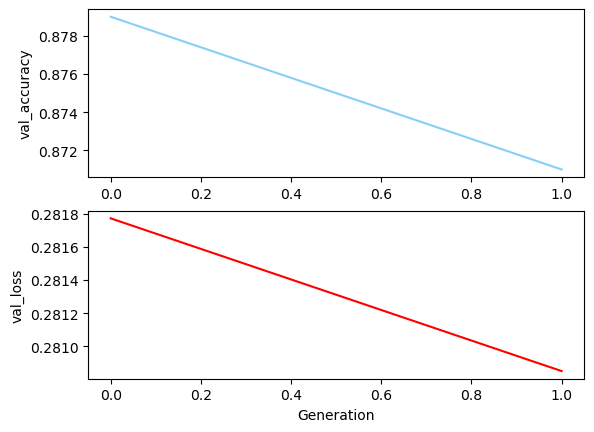

In [81]:
model = Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu",input_shape=(2000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation ="sigmoid"))
model.summary()
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
results = model.fit(train_x, train_y,epochs= 2,batch_size = 500,validation_data = (test_x, test_y))
print(np.mean(results.history["val_accuracy"]))
results_list.append(results)

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_ylabel("val_accuracy");
ax[1].set_xlabel("Generation");
ax[1].set_ylabel("val_loss");
ax[0].plot([i for i in range(len(results.history["val_accuracy"]))], results.history["val_accuracy"], color = 'lightskyblue')   
ax[1].plot([i for i in range(len(results.history["val_loss"]))], results.history["val_loss"], color = 'red') 
plt.show()

In [254]:
def vectorize3(sequences, dimension = 100):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


(training_data, training_targets), (testing_data,testing_targets) = imdb.load_data(num_words=100)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets),axis=0)
data = vectorize3(data)
targets = np.array(targets).astype("float32")
test_x = data[:100]
test_y = targets[:100]
train_x = data[100:]
train_y = targets[100:]

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 50)                5050      
                                                                 
 dropout_30 (Dropout)        (None, 50)                0         
                                                                 
 dense_61 (Dense)            (None, 50)                2550      
                                                                 
 dropout_31 (Dropout)        (None, 50)                0         
                                                                 
 dense_62 (Dense)            (None, 50)                2550      
                                                                 
 dense_63 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,201
Trainable params: 10,201
Non-tra

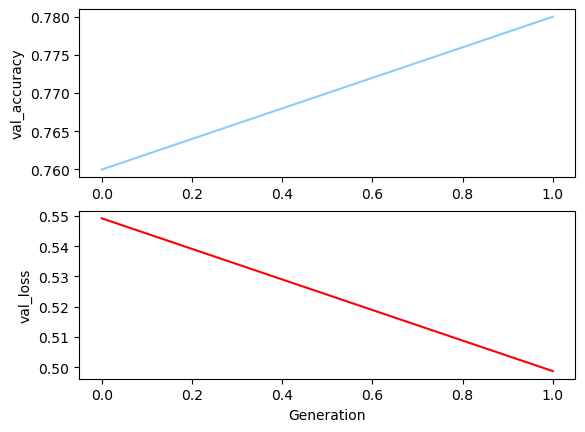

In [156]:
model = Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu",input_shape=(100, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation ="sigmoid"))
model.summary()
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
results = model.fit(train_x, train_y,epochs= 2,batch_size = 500,validation_data = (test_x, test_y))
print(np.mean(results.history["val_accuracy"]))
results_list.append(results)

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_ylabel("val_accuracy");
ax[1].set_xlabel("Generation");
ax[1].set_ylabel("val_loss");
ax[0].plot([i for i in range(len(results.history["val_accuracy"]))], results.history["val_accuracy"], color = 'lightskyblue')   
ax[1].plot([i for i in range(len(results.history["val_loss"]))], results.history["val_loss"], color = 'red') 
plt.show()

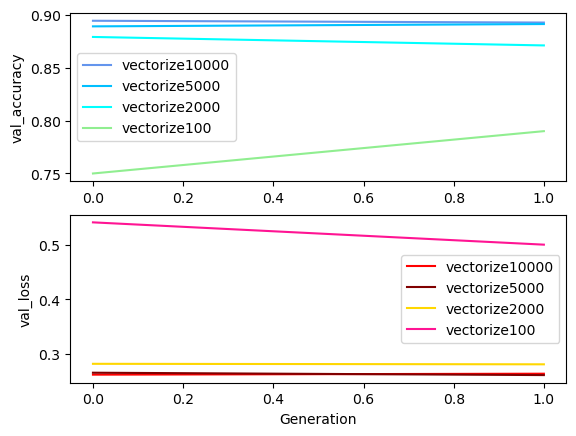

In [87]:
name=["vectorize10000","vectorize5000","vectorize2000","vectorize100"]
color_accuracy=["cornflowerblue","deepskyblue","cyan","lightgreen"]
color_loss=["red","maroon","gold","deeppink"]

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_ylabel("val_accuracy");
ax[1].set_xlabel("Generation");
ax[1].set_ylabel("val_loss");
for i in range(len(results_list)):
    ax[0].plot([i for i in range(len(results_list[i].history["val_accuracy"]))], results_list[i].history["val_accuracy"], color =color_accuracy[i] ,label =f"{name[i]}")   
    ax[1].plot([i for i in range(len(results_list[i].history["val_loss"]))], results_list[i].history["val_loss"], color =color_loss[i] ,label =f"{name[i]}") 
ax[0].legend()
ax[1].legend()
plt.show()

Как мы видим по графику, уменьшение вектора представление уменьшает точность нейросети, при это создается прямая зависимость точности и времени обучения при уменьшение вектора представления

In [249]:
def Get_word(word):
    if word in word_index:
        if word_index[word]<5000:
            return word_index[word]
    return -1

In [246]:
import string
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)
word_index = imdb.get_word_index()

In [252]:
text=input("Enter text:\n")
text = text.translate(str.maketrans('', '', string.punctuation))
text_list =text.lower().split()
text_data=[ Get_word(i)  for i in text_list]
text_data = vectorize2([text_data])


Enter text:
Superb, and truly one of the greatest movies of all time.  It starts with the screenplay. Adapted from, and very faithful to, an excellent book. The book by Chuck Palahniuk was perfect for a movie: vivid, powerful, challenging, original, unpredictable. Considering how perfectly formed the book already was, the screenplay would have been a doddle.  Some very interesting themes are explored - consumerism, class warfare, multiple-personality disorder, male bonding, terrorism and anarchy - without being judgemental.  Direction is spot-on. Perfect cinematography, pacing and editing. The twists and nuances of the book are captured perfectly.  Edward Norton and Brad Pitt are perfectly cast as the two lead characters, and deliver in spades. Helena Bonham Carter is a strange selection to take on the role of Marla, as she tends to act in Shakespearean dramas and other period pieces. However, despite this, her performance is very convincing.  An absolute classic.


In [253]:
prediction = model.predict(text_data)
print(prediction)

1/1 [==============================] - 0s 15ms/step
[[0.07056955]]


Для загрузки пользовательского текста был реализован метод, который находит в словаре imdb номер для введенного слова, либо заполняет его -1, что-бы оно не попало в вектор представления, если слово не найдено, после чего создаётся вектор представления.

Оценка на сайте с данным отзывом о фильме "Бойцовский клуб" высокая, что соответствует результату проверки его через нейросеть.